## Setup

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# display settings
%matplotlib inline
%load_ext nb_black
pd.options.display.max_columns = 999

<IPython.core.display.Javascript object>

In [2]:
# read data
try:
    DATA_DIR = "../data"
    FILENAME = "clothing_reviews.csv"
    df = pd.read_csv(os.path.join(DATA_DIR, FILENAME))
except FileNotFoundError as e:
    print(e)

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<IPython.core.display.Javascript object>

In [4]:
# drop Unnamed column
df.drop("Unnamed: 0", axis="columns", inplace=True)
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

<IPython.core.display.Javascript object>

In [5]:
# rename columns
df.columns = df.columns.str.replace(" ", "_").str.lower()

<IPython.core.display.Javascript object>

In [6]:
df["rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
# map sentiments from ratings
def sentiment(value):
    if value > 3:
        return 2  # positive sentiment
    if value == 3:
        return 1  # neutral
    else:
        return 0  # negative


df["rating"] = df["rating"].apply(sentiment)

<IPython.core.display.Javascript object>

In [8]:
df["rating"].value_counts()

2    18208
1     2871
0     2407
Name: rating, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
df["rating"].value_counts(normalize=True) * 100

2    77.527037
1    12.224304
0    10.248659
Name: rating, dtype: float64

<IPython.core.display.Javascript object>

77.53% of the reviews are positive, 12.22% are neutral, and 10.25% of the reviews are negative.  

In [10]:
df.isnull().sum()

clothing_id                   0
age                           0
title                      3810
review_text                 845
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                14
department_name              14
class_name                   14
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
df[df[["review_text", "rating"]].isna().any(axis=1)]

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
92,861,23,NaN,NaN,2,1,0,General Petite,Tops,Knits
93,1081,31,NaN,NaN,2,1,0,General,Dresses,Dresses
98,1133,50,NaN,NaN,2,1,0,General,Jackets,Outerwear
135,861,35,NaN,NaN,2,1,0,General Petite,Tops,Knits
142,1126,35,NaN,NaN,2,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,2,1,0,General,Tops,Knits
23301,862,52,NaN,NaN,2,1,0,General,Tops,Knits
23303,823,46,NaN,NaN,2,1,0,General,Tops,Blouses
23470,1104,39,NaN,NaN,2,1,0,General Petite,Dresses,Dresses


<IPython.core.display.Javascript object>

In [12]:
# drop rows where review text is null
df.dropna(subset=["review_text"], inplace=True)

<IPython.core.display.Javascript object>

In [13]:
df.isnull().sum()

clothing_id                   0
age                           0
title                      2966
review_text                   0
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                13
department_name              13
class_name                   13
dtype: int64

<IPython.core.display.Javascript object>

## Train, validation and test split

In [14]:
df.shape

(22641, 10)

<IPython.core.display.Javascript object>

In [15]:
from sklearn.model_selection import train_test_split

X = df["review_text"]
y = df["rating"]

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, test_size=0.2, stratify=y_trainval, random_state=42
)

<IPython.core.display.Javascript object>

In [16]:
print("Shape of training:", X_train.shape)
print("Shape of validation:", X_valid.shape)
print("Shape of test:", X_test.shape)

Shape of training: (14489,)
Shape of validation: (3623,)
Shape of test: (4529,)


<IPython.core.display.Javascript object>

In [17]:
# lowercase text
X_train = [review for review in X_train.str.lower()]
X_valid = [review for review in X_valid.str.lower()]
X_test = [review for review in X_test.str.lower()]

print("Type of training:", type(X_train))

Type of training: <class 'list'>


<IPython.core.display.Javascript object>

In [18]:
# reset index
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

<IPython.core.display.Javascript object>

## Bag Of Words

In [19]:
X_train[999]

"this dress is great for hiding any insecurities. it's also very comfy."

<IPython.core.display.Javascript object>

In [20]:
y_train[999]

2

<IPython.core.display.Javascript object>

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit([X_train[999]])
print(vect.get_feature_names())

['also', 'any', 'comfy', 'dress', 'for', 'great', 'hiding', 'insecurities', 'is', 'it', 'this', 'very']


<IPython.core.display.Javascript object>

In [22]:
X999 = vect.transform([X_train[999]])
print(X999.toarray())

[[1 1 1 1 1 1 1 1 1 1 1 1]]


<IPython.core.display.Javascript object>

In [23]:
# inverse transform
print(vect.inverse_transform(X999)[0])

['also' 'any' 'comfy' 'dress' 'for' 'great' 'hiding' 'insecurities' 'is'
 'it' 'this' 'very']


<IPython.core.display.Javascript object>

## Sentiment analysis

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_vect = vect.fit_transform(X_train)
X_valid_vect = vect.transform(X_valid)
X_test_vect = vect.transform(X_test)

<IPython.core.display.Javascript object>

In [25]:
X_train_vect

<14489x11752 sparse matrix of type '<class 'numpy.int64'>'
	with 619300 stored elements in Compressed Sparse Row format>

<IPython.core.display.Javascript object>

In [26]:
feature_names = vect.get_feature_names()
feature_names[:10]

['00', '00p', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite']

<IPython.core.display.Javascript object>

In [27]:
feature_names[4000:4020]

['femine',
 'feminie',
 'feminine',
 'femininity',
 'femme',
 'fence',
 'ferry',
 'fess',
 'festival',
 'festivals',
 'festive',
 'fetherston',
 'few',
 'fewer',
 'fi',
 'fiance',
 'fiancã',
 'fiattering',
 'fiber',
 'fibers']

<IPython.core.display.Javascript object>

In [28]:
feature_names[::500]

['00',
 'accent',
 'ate',
 'boodie',
 'cheapest',
 'contoured',
 'descided',
 'eit',
 'femine',
 'gentle',
 'home',
 'ja',
 'ljsut',
 'mismatched',
 'oil',
 'phot',
 'puffs',
 'review',
 'shani',
 'sons',
 'sumptuous',
 'tinge',
 'unstitched',
 'window']

<IPython.core.display.Javascript object>

In [29]:
# sentiment classification
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42, max_iter=10000)
lr_clf.fit(X_train_vect, y_train)

LogisticRegression(max_iter=10000, random_state=42)

<IPython.core.display.Javascript object>

In [30]:
lr_clf.score(X_valid_vect, y_valid)

0.8078940104885454

<IPython.core.display.Javascript object>

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_vect, y_train)
rf_clf.score(X_valid_vect, y_valid)

0.7750483025117306

<IPython.core.display.Javascript object>

In [32]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ["red"] * top_n + ["blue"] * top_n

    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-0.7, 2 * top_n)
    ax.set_frame_on(False)

<IPython.core.display.Javascript object>

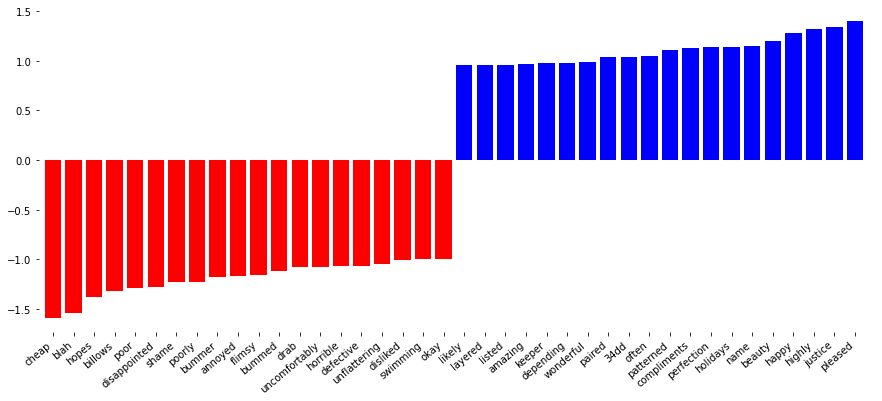

<IPython.core.display.Javascript object>

In [33]:
# important features for postive sentiment prediction
plt.figure(figsize=(15, 6))
plot_important_features(
    lr_clf.coef_[2].ravel(), np.array(feature_names), top_n=20, rotation=40
)
ax = plt.gca()

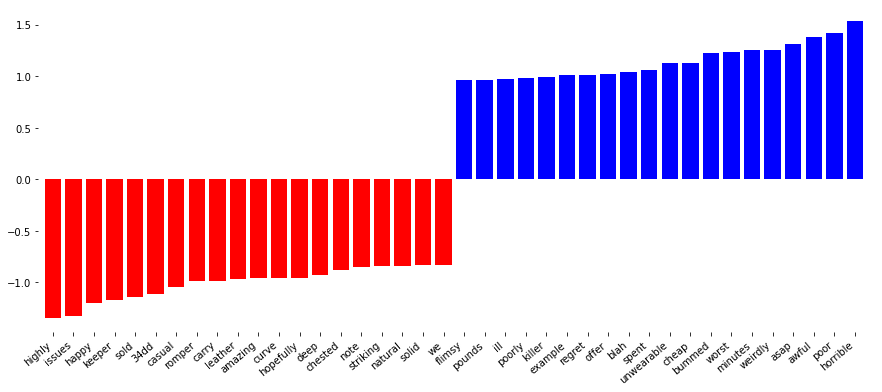

<IPython.core.display.Javascript object>

In [34]:
# important features for negative sentiment prediction
plt.figure(figsize=(15, 6))
plot_important_features(
    lr_clf.coef_[0].ravel(), np.array(feature_names), top_n=20, rotation=40
)
ax = plt.gca()

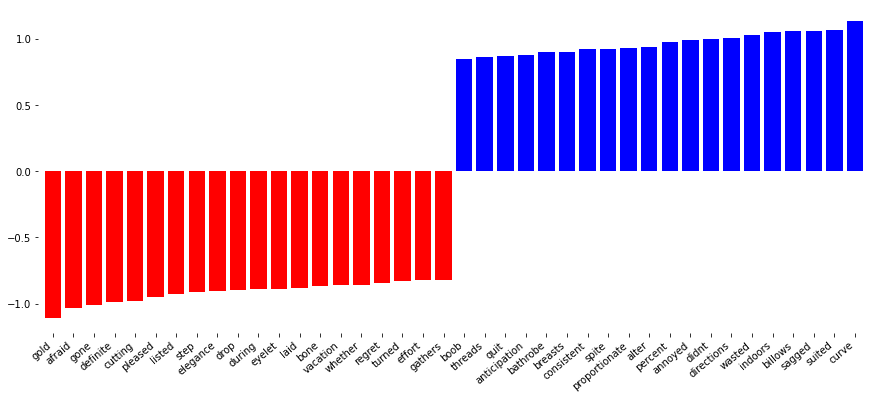

<IPython.core.display.Javascript object>

In [35]:
# important features for neutral sentiment prediction
plt.figure(figsize=(15, 6))
plot_important_features(
    lr_clf.coef_[1].ravel(), np.array(feature_names), top_n=20, rotation=40
)
ax = plt.gca()

## Removing stop words

In [36]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print(list(ENGLISH_STOP_WORDS))

['anyhow', 'part', 'ourselves', 'both', 'whither', 'every', 'further', 'amount', 'whose', 'moreover', 'formerly', 'eight', 'such', 'couldnt', 'full', 'meanwhile', 'wherever', 'be', 'should', 'under', 'whenever', 'others', 'being', 'something', 'there', 'top', 'have', 'his', 'seem', 'though', 'found', 'hereby', 'nothing', 'therein', 'after', 'thereafter', 'around', 'third', 'no', 'were', 'except', 'made', 'describe', 'empty', 'across', 'most', 'many', 'been', 'cannot', 'still', 'becoming', 'fire', 'its', 'do', 'thick', 'nine', 'in', 'onto', 'very', 'within', 'eg', 'here', 'anything', 'mine', 'seeming', 'or', 'at', 'beforehand', 'become', 'during', 'down', 'only', 'towards', 'would', 'their', 'see', 'not', 'anywhere', 'ltd', 'indeed', 'keep', 'had', 'whatever', 'get', 'with', 'among', 'together', 'thin', 'please', 'much', 'two', 'him', 'between', 'without', 'mill', 'sometime', 'how', 'became', 'was', 'hereupon', 'behind', 'along', 'whoever', 'those', 'fill', 'latterly', 'forty', 'neither

<IPython.core.display.Javascript object>

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words="english")
X_train_vect = vect.fit_transform(X_train)
X_valid_vect = vect.transform(X_valid)
X_test_vect = vect.transform(X_test)

<IPython.core.display.Javascript object>

In [38]:
X_train_vect

<14489x11467 sparse matrix of type '<class 'numpy.int64'>'
	with 341722 stored elements in Compressed Sparse Row format>

<IPython.core.display.Javascript object>

In [39]:
feature_names = vect.get_feature_names()
feature_names[:10]

['00', '00p', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite']

<IPython.core.display.Javascript object>

In [40]:
feature_names[::500]

['00',
 'accenting',
 'attic',
 'boutique',
 'chino',
 'corey',
 'diagonal',
 'embroiding',
 'fixture',
 'goodness',
 'humor',
 'kiddos',
 'luncheon',
 'mullet',
 'overlap',
 'polar',
 'rec',
 'sa',
 'simple',
 'stats',
 'taper',
 'tucking',
 'walters']

<IPython.core.display.Javascript object>

In [41]:
# sentiment classification
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42, max_iter=10000)
lr_clf.fit(X_train_vect, y_train)

LogisticRegression(max_iter=10000, random_state=42)

<IPython.core.display.Javascript object>

In [42]:
lr_clf.score(X_valid_vect, y_valid)

0.805133866961082

<IPython.core.display.Javascript object>

The score doesn't improved much after removing the stop words. 

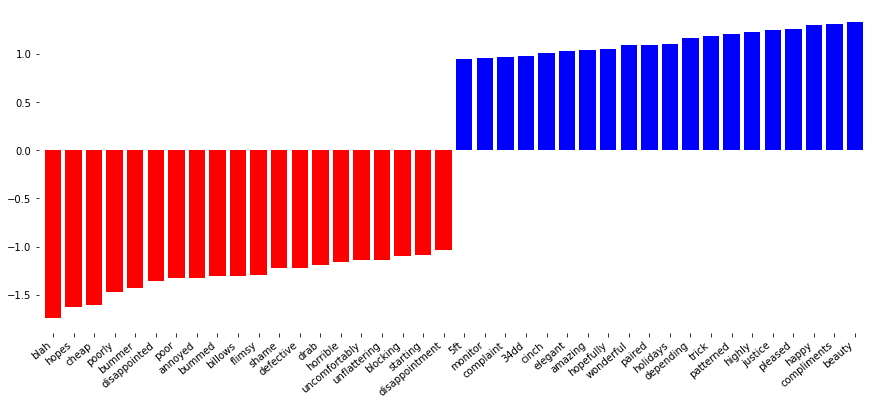

<IPython.core.display.Javascript object>

In [43]:
# important features for postive sentiment prediction
plt.figure(figsize=(15, 6))
plot_important_features(
    lr_clf.coef_[2].ravel(), np.array(feature_names), top_n=20, rotation=40
)
ax = plt.gca()

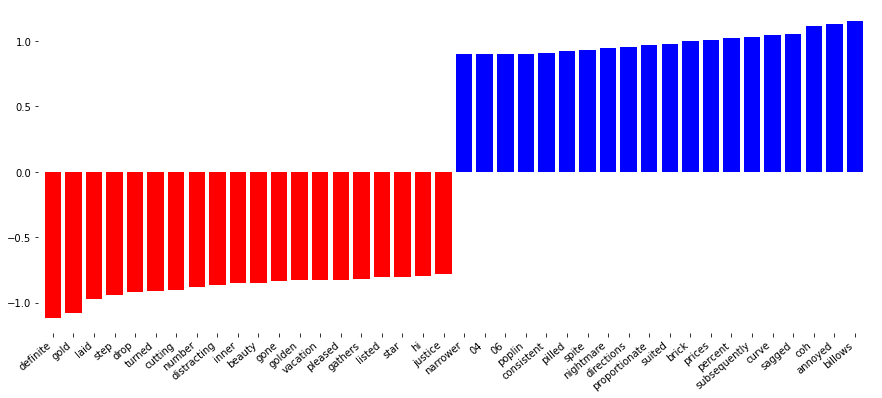

<IPython.core.display.Javascript object>

In [44]:
# important features for neutral sentiment prediction
plt.figure(figsize=(15, 6))
plot_important_features(
    lr_clf.coef_[1].ravel(), np.array(feature_names), top_n=20, rotation=40
)
ax = plt.gca()

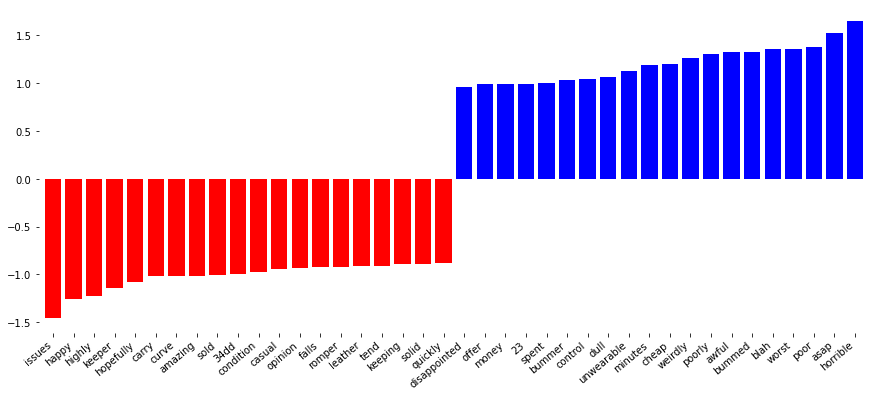

<IPython.core.display.Javascript object>

In [45]:
# important features for negative sentiment prediction
plt.figure(figsize=(15, 6))
plot_important_features(
    lr_clf.coef_[0].ravel(), np.array(feature_names), top_n=20, rotation=40
)
ax = plt.gca()

## Remove infrequent words

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# word has to appear in atleast 3 documents
vect = CountVectorizer(stop_words="english", min_df=3)
X_train_vect = vect.fit_transform(X_train)
X_valid_vect = vect.transform(X_valid)
X_test_vect = vect.transform(X_test)

<IPython.core.display.Javascript object>

In [47]:
# sentiment classification
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42, max_iter=10000)
lr_clf.fit(X_train_vect, y_train)

LogisticRegression(max_iter=10000, random_state=42)

<IPython.core.display.Javascript object>

In [48]:
lr_clf.score(X_valid_vect, y_valid)

0.8001656086116478

<IPython.core.display.Javascript object>

In [49]:
X_train_vect

<14489x5059 sparse matrix of type '<class 'numpy.int64'>'
	with 333850 stored elements in Compressed Sparse Row format>

<IPython.core.display.Javascript object>

Even though the feature space has reduced by more than half as it was before, the acurracy of the model has not reduced. It is still around 80%, which is good. Now, we have more meaningful features. 

##  TF-IDF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
X_train_tfid = tfid.fit_transform(X_train)
X_valid_tfid = tfid.transform(X_valid)
X_test_tfid = tfid.transform(X_test)

lr_clf = LogisticRegression(random_state=42, max_iter=10000)
lr_clf.fit(X_train_tfid, y_train)

LogisticRegression(max_iter=10000, random_state=42)

<IPython.core.display.Javascript object>

In [51]:
lr_clf.score(X_valid_tfid, y_valid)

0.826110957769804

<IPython.core.display.Javascript object>

Tf-idf improved the accuracy on the validation set by 2%. 

## N-grams

In [52]:
# unigram and trigram
vect = CountVectorizer(ngram_range=(1, 3))

X_train_vect = vect.fit_transform(X_train)
X_valid_vect = vect.transform(X_valid)
X_test_vect = vect.transform(X_test)

<IPython.core.display.Javascript object>

In [53]:
vect.get_feature_names()

['00',
 '00 after',
 '00 after trying',
 '00 also',
 '00 also usually',
 '00 am',
 '00 am and',
 '00 and',
 '00 and am',
 '00 and bought',
 '00 and it',
 '00 and oddly',
 '00 and the',
 '00 because',
 '00 because of',
 '00 blouse',
 '00 blouse am',
 '00 but',
 '00 but decided',
 '00 but do',
 '00 dollars',
 '00 dollars plan',
 '00 dress',
 '00 dress does',
 '00 dress the',
 '00 fit',
 '00 fit me',
 '00 fits',
 '00 fits perfectly',
 '00 for',
 '00 for my',
 '00 for reference',
 '00 for sweater',
 '00 if',
 '00 if those',
 '00 in',
 '00 in dresses',
 '00 in my',
 '00 in pants',
 '00 in this',
 '00 it',
 '00 it fits',
 '00 it probably',
 '00 just',
 '00 just as',
 '00 looked',
 '00 looked like',
 '00 now',
 '00 now there',
 '00 oh',
 '00 oh well',
 '00 omg',
 '00 omg it',
 '00 or',
 '00 or and',
 '00 or but',
 '00 or petite',
 '00 petite',
 '00 petite 96',
 '00 petite already',
 '00 petite fits',
 '00 petite in',
 '00 petite one',
 '00 petite was',
 '00 price',
 '00 price tag',
 '00 regul

<IPython.core.display.Javascript object>

In [54]:
lr_clf = LogisticRegression(random_state=42, max_iter=10000)
lr_clf.fit(X_train_vect, y_train)

lr_clf.score(X_valid_vect, y_valid)

0.8330113165884626

<IPython.core.display.Javascript object>

Using n-grams further increases the accuracy of the model.

In [55]:
# unigram and 4-grams
vect = CountVectorizer(ngram_range=(1, 4), stop_words="english")

X_train_vect = vect.fit_transform(X_train)
X_valid_vect = vect.transform(X_valid)
X_test_vect = vect.transform(X_test)

<IPython.core.display.Javascript object>

In [56]:
vect.get_feature_names()

['00',
 '00 115',
 '00 115 lbs',
 '00 115 lbs definitely',
 '00 32b',
 '00 32b bra',
 '00 32b bra size',
 '00 32c',
 '00 32c cup',
 '00 32c cup 24',
 '00 aren',
 '00 aren size',
 '00 aren size return',
 '00 arm',
 '00 arm length',
 '00 arm length way',
 '00 big',
 '00 big type',
 '00 big type dress',
 '00 blouse',
 '00 blouse crazy',
 '00 blouse crazy 00',
 '00 bought',
 '00 bought didn',
 '00 bought didn stock',
 '00 bought xs',
 '00 bought xs gotten',
 '00 decided',
 '00 decided stick',
 '00 decided stick look',
 '00 dollars',
 '00 dollars plan',
 '00 dollars plan return',
 '00 dress',
 '00 dress does',
 '00 dress does run',
 '00 dress quality',
 '00 dress quality terrible',
 '00 dresses',
 '00 dresses great',
 '00 dresses great dress',
 '00 fit',
 '00 fit fine',
 '00 fit fine blousy',
 '00 fits',
 '00 fits great',
 '00 fits great body',
 '00 fits perfectly',
 '00 fits perfectly overall',
 '00 fits perfectly say',
 '00 got',
 '00 got little',
 '00 got little tight',
 '00 just',
 '00 

<IPython.core.display.Javascript object>

In [57]:
lr_clf = LogisticRegression(random_state=42, max_iter=10000)
lr_clf.fit(X_train_vect, y_train)

lr_clf.score(X_valid_vect, y_valid)

0.8158984267181894

<IPython.core.display.Javascript object>

In [58]:
# 4-grams
vect = CountVectorizer(ngram_range=(4, 4), min_df=4)

X_train_vect = vect.fit_transform(X_train)
X_valid_vect = vect.transform(X_valid)
X_test_vect = vect.transform(X_test)

<IPython.core.display.Javascript object>

In [59]:
lr_clf = LogisticRegression(random_state=42, max_iter=10000)
lr_clf.fit(X_train_vect, y_train)

lr_clf.score(X_valid_vect, y_valid)

0.7800165608611648

<IPython.core.display.Javascript object>

In [60]:
vect.get_feature_names()

['10 12 and took',
 '10 12 in tops',
 '10 and got the',
 '10 and ordered the',
 '10 and the length',
 '10 and the medium',
 '10 or 12 in',
 '110 lbs and the',
 '110 pounds and ordered',
 '115 lbs 26 in',
 '115 lbs 30 dd',
 '115 lbs 30dd 26',
 '115 lbs 30dd chest',
 '115 lbs and ordered',
 '115 lbs for reference',
 '12 14 and the',
 '12 14 in bottoms',
 '12 and it fit',
 '12 and the large',
 '12 in tops 12',
 '120 lbs and the',
 '120lbs 34dd bra and',
 '125 lbs and ordered',
 '125 lbs and the',
 '130 athletic muscular body',
 '135 and the small',
 '135lbs 34c curvy muscular',
 '140 lbs and the',
 '145 lbs and 38',
 '150 lbs and ordered',
 '26 and they fit',
 '26 in waist 115',
 '26 waist 36 hips',
 '28 and they fit',
 '30 dd 26 in',
 '30dd 26 in waist',
 '32 40 and the',
 '34b 26 waist 36',
 '34c and the small',
 '34c and the xs',
 '34c curvy muscular frame',
 '34d 27 35 and',
 '34d and the size',
 '34dd bra and take',
 '36 hips and it',
 '36d 32 40 and',
 '36d and the medium',
 '36dd 1

<IPython.core.display.Javascript object>

So, far unigram and trigram works best and tf-idf also improves the accuracy. 

In [61]:
# unigram and trigram and no stop word removal
vect = CountVectorizer(ngram_range=(1, 3))

X_train_vect = vect.fit_transform(X_train)
X_valid_vect = vect.transform(X_valid)
X_test_vect = vect.transform(X_test)

<IPython.core.display.Javascript object>

In [62]:
lr_clf = LogisticRegression(random_state=42, max_iter=10000)
lr_clf.fit(X_train_vect, y_train)

lr_clf.score(X_valid_vect, y_valid)

0.8330113165884626

<IPython.core.display.Javascript object>

In [63]:
feature_names = vect.get_feature_names()

<IPython.core.display.Javascript object>

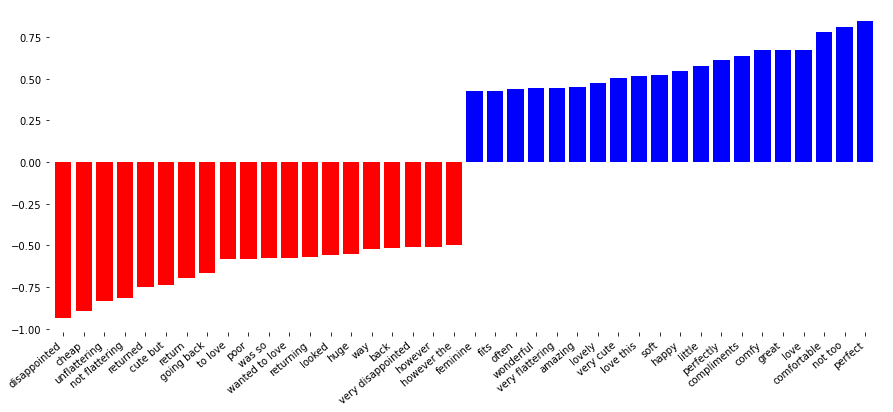

<IPython.core.display.Javascript object>

In [64]:
# important features for postive sentiment prediction
plt.figure(figsize=(15, 6))
plot_important_features(
    lr_clf.coef_[2].ravel(), np.array(feature_names), top_n=20, rotation=40
)
ax = plt.gca()

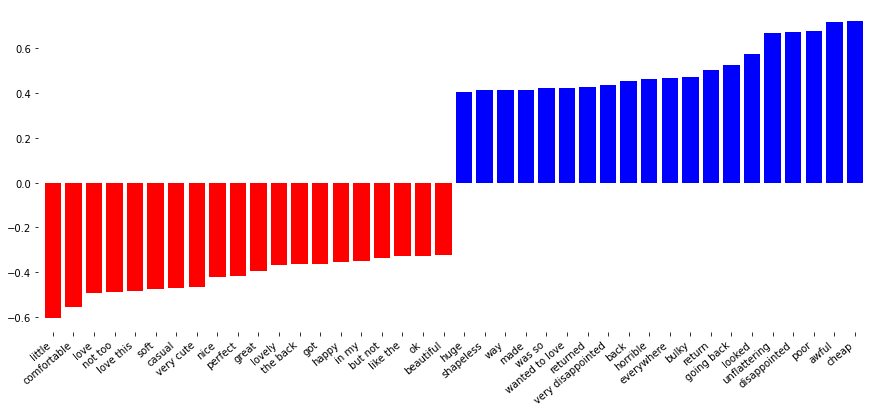

<IPython.core.display.Javascript object>

In [65]:
# important features for negative sentiment prediction
plt.figure(figsize=(15, 6))
plot_important_features(
    lr_clf.coef_[0].ravel(), np.array(feature_names), top_n=20, rotation=40
)
ax = plt.gca()

## Grid Search with Pipelines

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfid", TfidfTransformer()),
        ("lr_clf", LogisticRegression(random_state=42, max_iter=10000)),
    ]
)

param_grid = {
    "lr_clf__C": [100, 10, 1, 0.1, 0.001],
    "vect__ngram_range": [
        (1, 1),
        (1, 2),
        (1, 3),
        (1, 4),
        (2, 2),
        (2, 3),
        (3, 8),
        (5, 5),
    ],
    "vect__min_df": [1, 2, 3],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfid', TfidfTransformer()),
                                       ('lr_clf',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'lr_clf__C': [100, 10, 1, 0.1, 0.001],
                         'vect__min_df': [1, 2, 3],
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4),
                                               (2, 2), (2, 3), (3, 8),
                                               (5, 5)]},
             verbose=1)

<IPython.core.display.Javascript object>

In [72]:
grid.best_score_

0.8280069360917615

<IPython.core.display.Javascript object>

In [73]:
grid.best_params_

{'lr_clf__C': 10, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}

<IPython.core.display.Javascript object>